In [1]:
from google.colab import drive

drive.mount('/gdrive')

Mounted at /gdrive


기본적인 EDA 과정은 


https://dacon.io/competitions/official/235836/codeshare/3594?page=1&dtype=recent
를 기반으로 하였습니다.

위의 코드에서 2가지 직관을 얻을 수 있었습니다.

1) 데이터의 수가 적다 -> K-fold로 학습을 수행하면, K를 너무 작게 주면 데이터 수의 부족으로 인해서 적절한 모델이 만들어질 수 없겠다.

해결책 : loocv를 사용해서 모델의 데이터를 최대한 유지하자.

2) 꽃의 종류에 따라 구분되는 특징이 존재한다. -> 꽃의 종류에 따른 각각의 학습 모델을 만들자.

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [3]:
train = pd.read_csv('/gdrive/My Drive/dacon/iris/iris_train.csv')

# 꽃의 종류별로 나누고 상관관계 분석

In [4]:
train1 = train[train.species=='setosa']
train1.corr()

,id,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
id,1.000000,0.105284,0.325071,0.208995,-0.035156
sepal length (cm),0.105284,1.000000,0.214368,0.861071,0.332405
petal length (cm),0.325071,0.214368,1.000000,0.219777,0.512989
sepal width (cm),0.208995,0.861071,0.219777,1.000000,0.576726
petal width (cm),-0.035156,0.332405,0.512989,0.576726,1.000000


In [5]:
train2 = train[train.species=='versicolor']
train2.corr()

,id,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
id,1.000000,-0.116576,-0.115439,-0.102846,-0.129484
sepal length (cm),-0.116576,1.000000,0.769562,0.569564,0.495648
petal length (cm),-0.115439,0.769562,1.000000,0.564314,0.751556
sepal width (cm),-0.102846,0.569564,0.564314,1.000000,0.639143
petal width (cm),-0.129484,0.495648,0.751556,0.639143,1.000000


In [6]:
train3 = train[train.species=='virginica']
train3.corr()

,id,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
id,1.000000,-0.364443,-0.318217,-0.076079,-0.157974
sepal length (cm),-0.364443,1.000000,0.909107,0.473749,0.247149
petal length (cm),-0.318217,0.909107,1.000000,0.418791,0.386929
sepal width (cm),-0.076079,0.473749,0.418791,1.000000,0.549109
petal width (cm),-0.157974,0.247149,0.386929,0.549109,1.000000


In [7]:
train1.drop(['id','species'], axis=1,  inplace=True)
train2.drop(['id','species'], axis=1,  inplace=True)
train3.drop(['id','species'], axis=1,  inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# 꽃의 종류별로 상관관계와 데이터분포 확인

1) 상관관계가 높은 feature들은 대부분 선형적인 특성이 나타나지만, 상관관계가 낮으면 그래프로 특징을 찾기가 힘들다.

2) 데이터가 적고, feature가 적기 때문에 모델은 최대한 단순해야 한다.

-> 그래프에서 선형이 보이면 LinearRegression 모델을 사용하고, 그 외에는 비선형관계를 표현 가능한 RandomForestRegressor 모델을 사용한다.

In [8]:
train1.corr()

,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
sepal length (cm),1.000000,0.214368,0.861071,0.332405
petal length (cm),0.214368,1.000000,0.219777,0.512989
sepal width (cm),0.861071,0.219777,1.000000,0.576726
petal width (cm),0.332405,0.512989,0.576726,1.000000


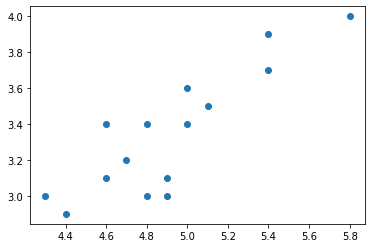

In [9]:
import matplotlib.pyplot as plt
plt.scatter(train1['sepal length (cm)'],train1['sepal width (cm)'] )

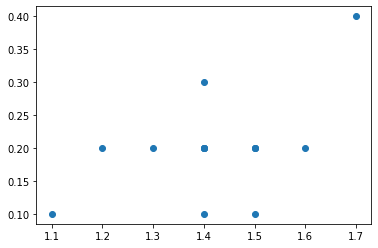

In [10]:
plt.scatter(train1['petal length (cm)'],train1['petal width (cm)'] )

In [11]:
train2.corr()

,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
sepal length (cm),1.000000,0.769562,0.569564,0.495648
petal length (cm),0.769562,1.000000,0.564314,0.751556
sepal width (cm),0.569564,0.564314,1.000000,0.639143
petal width (cm),0.495648,0.751556,0.639143,1.000000


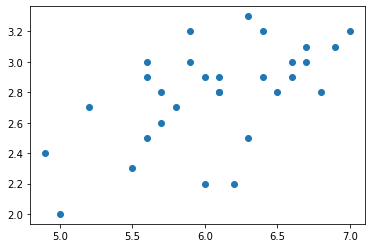

In [12]:
plt.scatter(train2['sepal length (cm)'],train2['sepal width (cm)'] )

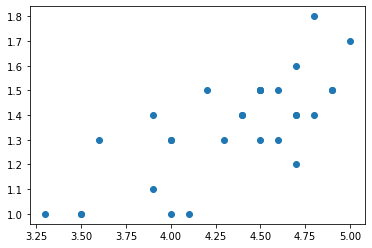

In [13]:
plt.scatter(train2['petal length (cm)'],train2['petal width (cm)'] )

In [14]:
train3.corr()

,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
sepal length (cm),1.000000,0.909107,0.473749,0.247149
petal length (cm),0.909107,1.000000,0.418791,0.386929
sepal width (cm),0.473749,0.418791,1.000000,0.549109
petal width (cm),0.247149,0.386929,0.549109,1.000000


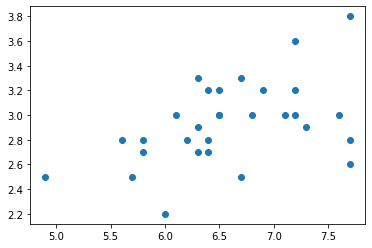

In [15]:
plt.scatter(train3['sepal length (cm)'],train3['sepal width (cm)'] )

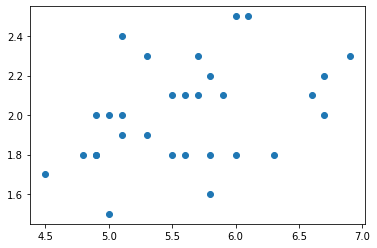

In [16]:
plt.scatter(train3['petal length (cm)'],train3['petal width (cm)'] )

# 모델은 최대한 단순하게 구성하고 결과 확인

1) 선형관계 존재 -> LinearRegression()

2) RandomForestRegressor -> max_depth = 1



1), 2)로 모델을 만들고 실제로 적용해 보았을 때, 예측의 수행이 어느 정도 정확한지 loocv를 통해 관찰한다.

(빨간색 : 이상치,   파란색 : 실제 데이터,   초록색 : 예측)

In [17]:
train1 = np.array(train1)

pre_list1 = []
pre_list2 = []

ans1 = []
ans2 = []

models_1_1 = []
models_1_2 = []

for i in range(len(train1)):
    if i==0:
      tmp_data = train1[i+1:]
    else:
      tmp_data = np.append(train1[i+1:], train1[:i-1], axis = 0)

    model_1_1= LinearRegression()
    model_1_1.fit(tmp_data[:,0].reshape(-1,1), tmp_data[:,2])
    models_1_1.append(model_1_1)

    model_1_2= RandomForestRegressor(max_depth = 1, criterion = 'mae', random_state=0)
    model_1_2.fit(tmp_data[:,:2], tmp_data[:,3])
    models_1_2.append(model_1_2)

    ans1.append(model_1_1.predict(train1[i][0].reshape(-1,1)))
    ans2.append(model_1_2.predict(train1[i][:2].reshape(-1,2)))

    pre_list1.append(abs(train1[i][2] - model_1_1.predict(train1[i][0].reshape(-1,1))))
    pre_list2.append(abs(train1[i][3] - model_1_2.predict(train1[i][:2].reshape(-1,2))))


In [18]:
np.mean(pre_list1) 

0.13824770626605715

In [19]:
np.mean(pre_list2) 

0.047700000000000006

1
10


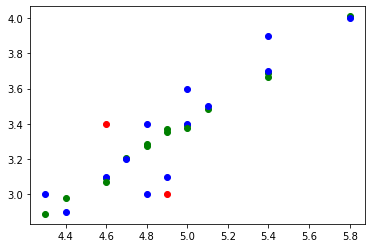

In [20]:

for i in range(len(pre_list1)):
    
    plt.scatter(train1[i][0], ans1[i], color='g')
    if np.abs(pre_list1[i])<0.3:
        plt.scatter(train1[i][0], train1[i][2], color='b')
    else:
        print(i)
        plt.scatter(train1[i][0], train1[i][2], color='r')


2
6
10


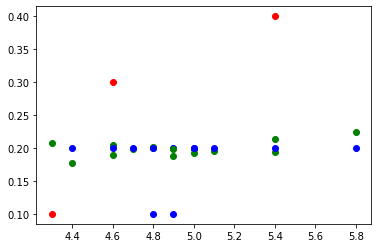

In [21]:
for i in range(len(pre_list2)):
    plt.scatter(train1[i][0], ans2[i], color='g')
    if np.abs(pre_list2[i])<0.1:
        plt.scatter(train1[i][0], train1[i][3], color='b')
    else:
        print(i)
        plt.scatter(train1[i][0], train1[i][3], color='r')

In [22]:
train2 = np.array(train2)

pre_list1 = []
pre_list2 = []

ans1 = []
ans2 = []

models_2_1 = []
models_2_2 = []

for i in range(len(train2)):
    if i==0:
      tmp_data = train2[i+1:]
    else:
      tmp_data = np.append(train2[i+1:], train2[:i-1], axis = 0)

    
    model_2_1= RandomForestRegressor(max_depth =1, criterion = 'mae', random_state=0)#
    model_2_1.fit(tmp_data[:,:2], tmp_data[:,2])
    models_2_1.append(model_2_1)

    model_2_2= LinearRegression()
    model_2_2.fit(tmp_data[:,1].reshape(-1,1), tmp_data[:,3])
    models_2_2.append(model_2_2)
    
    ans1.append(model_2_1.predict(train2[i][:2].reshape(-1,2)))
    ans2.append(model_2_2.predict(train2[i][1].reshape(-1,1)))

    pre_list1.append(abs(train2[i][2] - model_2_1.predict(train2[i][:2].reshape(-1,2))))
    pre_list2.append(abs(train2[i][3] - model_2_2.predict(train2[i][1].reshape(-1,1))))


In [23]:
np.mean(pre_list1)

0.22479999999999994

21


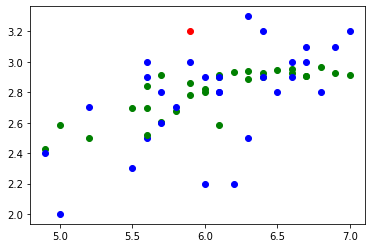

In [24]:
for i in range(len(pre_list1)):
    
    plt.scatter(train2[i][0], ans1[i], color='g')
    if np.abs(pre_list2[i])<0.3:
        plt.scatter(train2[i][0], train2[i][2], color='b')
    else:
        print(i)
        plt.scatter(train2[i][0], train2[i][2], color='r')


In [25]:
np.mean(pre_list2)

0.1205785786588805

0
4
5
7
14
20
21
26
27


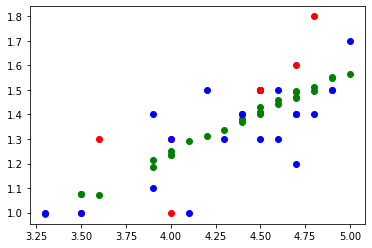

In [26]:
for i in range(len(pre_list1)):
    
    plt.scatter(train2[i][1], ans2[i], color='g')
    if np.abs(pre_list1[i])<0.3:
        plt.scatter(train2[i][1], train2[i][3], color='b')
    else:
        print(i)
        plt.scatter(train2[i][1], train2[i][3], color='r')

In [27]:
train3 = np.array(train3)

pre_list1 = []
pre_list2 = []

ans1 = []
ans2 = []

models_3_1 = []
models_3_2 = []

for i in range(len(train3)):
    if i==0:
      tmp_data = train3[i+1:]
    else:
      tmp_data = np.append(train3[i+1:], train3[:i-1], axis = 0)

    
    model_3_1= RandomForestRegressor(max_depth = 1, criterion = 'mae', random_state=0)#
    model_3_1.fit(tmp_data[:,:2], tmp_data[:,2])
    models_3_1.append(model_3_1)

    model_3_2= RandomForestRegressor(max_depth = 1, criterion = 'mae', random_state=0)#
    model_3_2.fit(tmp_data[:,:2], tmp_data[:,3])
    models_3_2.append(model_3_2)
    
    ans1.append(model_3_1.predict(train3[i][:2].reshape(-1,2)))
    ans2.append(model_3_2.predict(train3[i][:2].reshape(-1,2)))

    pre_list1.append(abs(train3[i][2] - model_3_1.predict(train3[i][:2].reshape(-1,2))))
    pre_list2.append(abs(train3[i][3] - model_3_2.predict(train3[i][:2].reshape(-1,2))))

In [28]:
np.mean(pre_list1)

0.24541666666666664

1
3
5
7
11
13
14
15
16
17
19
21
23
28
29


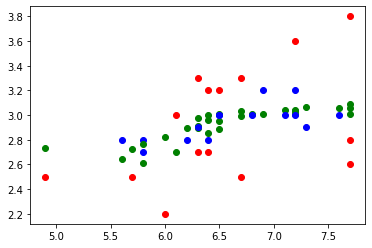

In [29]:
for i in range(len(pre_list1)):
    
    plt.scatter(train3[i][0], ans1[i], color='g')
    if np.abs(pre_list1[i])<0.2:
        plt.scatter(train3[i][0], train3[i][2], color='b')
    else:
        print(i)
        plt.scatter(train3[i][0], train3[i][2], color='r')


In [30]:
np.mean(pre_list2)

0.21658333333333324

1
3
5
7
11
13
14
15
16
17
19
21
23
28
29


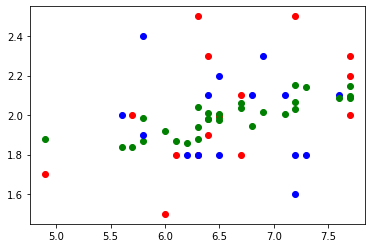

In [31]:
for i in range(len(pre_list1)):
    
    if np.abs(pre_list1[i])<0.2:
        plt.scatter(train3[i][0], train3[i][3], color='b')
    else:
        print(i)
        plt.scatter(train3[i][0], train3[i][3], color='r')
        
    plt.scatter(train3[i][0], ans2[i], color='g')

# 추론

In [32]:
test = pd.read_csv('/gdrive/My Drive/dacon/iris/iris_test.csv')

In [33]:
test

,id,species,sepal length (cm),petal length (cm)
0,0,setosa,5.4,1.7
1,1,setosa,5.7,1.5
2,2,setosa,5.3,1.5
3,3,setosa,5.1,1.9
4,4,virginica,6.0,4.8
...,...,...,...,...
70,70,versicolor,5.8,4.0
71,71,setosa,4.4,1.3
72,72,virginica,6.3,5.6
73,73,versicolor,5.1,3.0


In [34]:
test2 = np.array(test)
test3 = np.array(test2[:,2:]).astype(np.float64)

#loocv를 이용하여 만든 모델들을 앙상블

만약 데이터에 이상치가 존재한다면 중앙값을 사용하고, 존재하지 않는다면 평균을 사용(각각 사용해서 2개의 제출 파일을 만들어서 제출하였습니다)

(평가 기준이 MSE가 아닌 MAE이기 때문에, 데이터에 이상치가 존재할 가능성이 높고 중앙값을 사용하는 것이 더 적절할 수 있다고 생각합니다.)

In [35]:
ans = np.zeros((len(test2), 2))

for i in range(len(ans)):
    
    #model1
    if test2[i][1]=='setosa':
        tmp1 = []
        tmp2 = []
        for j in range(len(models_1_1)):
            ans_tmp1 = models_1_1[j].predict(test3[i][0].reshape(-1, 1))
            ans_tmp2 = model_1_2[j].predict(test3[i].reshape(-1, 2))
            tmp1.append(ans_tmp1)
            tmp2.append(ans_tmp2)

        ans[i][0] = np.mean(tmp1)#
        ans[i][1] = np.mean(tmp2)#


    #model2
    elif test2[i][1]=='versicolor':
        tmp1 = []
        tmp2 = []
        for j in range(len(models_2_1)):
            ans_tmp1 = models_2_1[j].predict(test3[i].reshape(-1, 2))
            ans_tmp2 = models_2_2[j].predict(test3[i][1].reshape(-1, 1))
            tmp1.append(ans_tmp1)
            tmp2.append(ans_tmp2)
        
        ans[i][0] = np.mean(tmp1)
        ans[i][1] = np.mean(tmp2)

    else:
        tmp1 = []
        tmp2 = []
        for j in range(len(models_3_1)):
            ans_tmp1 = models_3_1[j].predict(test3[i].reshape(-1, 2))
            ans_tmp2 = models_3_2[j].predict(test3[i].reshape(-1, 2))
            tmp1.append(ans_tmp1)
            tmp2.append(ans_tmp2)
        
        ans[i][0] = np.mean(tmp1)
        ans[i][1] = np.mean(tmp2)


In [36]:
submission = pd.read_csv('/gdrive/My Drive/dacon/iris/sample_submission.csv')
submission['sepal width (cm)'] = ans[:,0]
submission['petal width (cm)'] = ans[:,1]

In [37]:
submission.to_csv('/gdrive/My Drive/dacon/iris/second_submission_MAE_mean.csv', index=False)

In [38]:
submission

,id,sepal width (cm),petal width (cm)
0,0,3.708343,0.306667
1,1,3.931315,0.200000
2,2,3.634020,0.200000
3,3,3.485372,0.306667
4,4,2.728233,1.845217
...,...,...,...
70,70,2.664483,1.238169
71,71,2.965104,0.193333
72,72,2.926317,1.969200
73,73,2.441317,0.892868


In [39]:
test = pd.read_csv('/gdrive/My Drive/dacon/iris/iris_test.csv')

In [40]:
test2 = np.array(test)
test3 = np.array(test2[:,2:]).astype(np.float64)

In [41]:
ans = np.zeros((len(test2), 2))

for i in range(len(ans)):
    
    #model1
    if test2[i][1]=='setosa':
        tmp1 = []
        tmp2 = []
        for j in range(len(models_1_1)):
            ans_tmp1 = models_1_1[j].predict(test3[i][0].reshape(-1, 1))
            ans_tmp2 = model_1_2[j].predict(test3[i].reshape(-1, 2))
            tmp1.append(ans_tmp1)
            tmp2.append(ans_tmp2)

        ans[i][0] = np.median(tmp1)#
        ans[i][1] = np.median(tmp2)#


    #model2
    elif test2[i][1]=='versicolor':
        tmp1 = []
        tmp2 = []
        for j in range(len(models_2_1)):
            ans_tmp1 = models_2_1[j].predict(test3[i].reshape(-1, 2))
            ans_tmp2 = models_2_2[j].predict(test3[i][1].reshape(-1, 1))
            tmp1.append(ans_tmp1)
            tmp2.append(ans_tmp2)
        
        ans[i][0] = np.median(tmp1)
        ans[i][1] = np.median(tmp2)

    else:
        tmp1 = []
        tmp2 = []
        for j in range(len(models_3_1)):
            ans_tmp1 = models_3_1[j].predict(test3[i].reshape(-1, 2))
            ans_tmp2 = models_3_2[j].predict(test3[i].reshape(-1, 2))
            tmp1.append(ans_tmp1)
            tmp2.append(ans_tmp2)
        
        ans[i][0] = np.median(tmp1)
        ans[i][1] = np.median(tmp2)

In [42]:
submission = pd.read_csv('/gdrive/My Drive/dacon/iris/sample_submission.csv')
submission['sepal width (cm)'] = ans[:,0]
submission['petal width (cm)'] = ans[:,1]

In [43]:
submission.to_csv('/gdrive/My Drive/dacon/iris/second_submission_MAE_median.csv', index=False)#